# Import Statements

In [35]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random
from pprint import pprint
#from google.colab import files
#import io 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

random.seed(45)

# Train Test Split


In [36]:
def train_test_split(df, test_size):
  if isinstance(test_size, float):
    test_size = round(test_size*len(df))#Calculating the test size 

  indices = df.index.tolist()
  test_indices = random.sample(population = indices, k = test_size)#Random sampling of data
  test_df = df.loc[test_indices]#Getting the test data set
  train_df = df.drop(test_indices)#Getting the train data set
  return train_df, test_df

# Get Accuracy

In [37]:
def getAccuracy(preds,labels):
  if len(preds) != len(labels):
    print("Shape of Actual label array & predicted label array should be same.")
    exit(1)
     
  correct_count=0
  for i in range(0,len(preds)):
    #print(i)
    if(preds[i]==labels[i]):
      correct_count+=1
  return correct_count/len(preds)

# Linear Kernel

      Attribute1  Attribute2  Attribute3  ...  Attribute40  Attribute41  Class
0          3.919      2.6909           0  ...            0            0     RB
1          4.170      2.1144           0  ...            0            0     RB
2          3.932      3.2512           0  ...            0            0     RB
3          3.000      2.7098           0  ...            0            0     RB
4          4.236      3.3944           0  ...            0            0     RB
...          ...         ...         ...  ...          ...          ...    ...
1050       5.431      2.8955           0  ...            0            0    NRB
1051       5.287      3.3732           0  ...            0            0    NRB
1052       4.869      1.7670           0  ...            1            0    NRB
1053       5.158      1.6914           2  ...            0            1    NRB
1054       5.076      2.6588           2  ...            0            2    NRB

[1055 rows x 42 columns]
For linear kernel:
 C valu

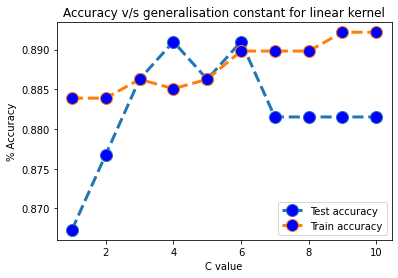

In [38]:
li=[]
for i in range(1,42):
  string='Attribute'+str(i)
  li.append(string)
li.append("Class")
df = pd.read_csv('biodeg.csv',sep=';',names=li)
# print(df.columns)
# print(df.shape)
print(df)

train_df,test_df=train_test_split(df,0.2)
c_value=[1,2,3,4,5,6,7,8,9,10]
train_acc=[]
test_acc=[]
#Linear
print("For linear kernel:")
for i in range(1,11):
  print(" C value=",i)
  svc_classifier = SVC(C=i,kernel='linear')
  svc_classifier.fit(train_df.drop(['Class'],axis=1),train_df['Class'])
  print("   Training set accuracy:", end =" ")
  train_y_pred= svc_classifier.predict(train_df.drop(['Class'],axis=1))
  acc=getAccuracy(train_y_pred.tolist(),train_df['Class'].tolist())
  train_acc.append(acc)
  print(acc)
  print("   Test set accuracy:", end =" ")
  test_y_pred = svc_classifier.predict(test_df.drop(['Class'],axis=1))
  acc=getAccuracy(test_y_pred.tolist(),test_df['Class'].tolist())
  test_acc.append(acc)
  print(acc)

# plotting the points  
plt.plot(c_value, test_acc, linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12,label="Test accuracy") 
plt.plot(c_value, train_acc, linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12,label="Train accuracy") 
  
plt.legend()
plt.xlabel('C value') 
plt.ylabel('% Accuracy') 
plt.title('Accuracy v/s generalisation constant for linear kernel') 
plt.show() 

# C=4 gives best test accuracy(89.099%)


# Quadratic Kernel


For quadratic kernel:
 C value= 1
   Training set accuracy: 0.8222748815165877
   Test set accuracy: 0.8388625592417062
 C value= 2
   Training set accuracy: 0.8364928909952607
   Test set accuracy: 0.8625592417061612
 C value= 3
   Training set accuracy: 0.8376777251184834
   Test set accuracy: 0.8625592417061612
 C value= 4
   Training set accuracy: 0.8424170616113744
   Test set accuracy: 0.8578199052132701
 C value= 5
   Training set accuracy: 0.8424170616113744
   Test set accuracy: 0.8530805687203792
 C value= 6
   Training set accuracy: 0.8495260663507109
   Test set accuracy: 0.8530805687203792
 C value= 7
   Training set accuracy: 0.8530805687203792
   Test set accuracy: 0.8483412322274881
 C value= 8
   Training set accuracy: 0.8590047393364929
   Test set accuracy: 0.8483412322274881
 C value= 9
   Training set accuracy: 0.8578199052132701
   Test set accuracy: 0.8530805687203792
 C value= 10
   Training set accuracy: 0.8578199052132701
   Test set accuracy: 0.8483412322274

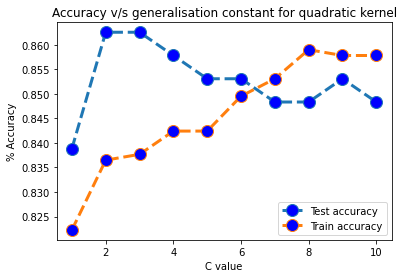

In [39]:
train_acc=[]
test_acc=[]
print("\nFor quadratic kernel:")
for i in range(1,11):
  print(" C value=",i)
  svc_classifier = SVC(C=i,kernel='poly',degree=2)
  svc_classifier.fit(train_df.drop(['Class'],axis=1),train_df['Class'])
  print("   Training set accuracy:", end =" ")
  train_y_pred= svc_classifier.predict(train_df.drop(['Class'],axis=1))
  acc=getAccuracy(train_y_pred.tolist(),train_df['Class'].tolist())
  train_acc.append(acc)
  print(acc)
  print("   Test set accuracy:", end =" ")
  test_y_pred = svc_classifier.predict(test_df.drop(['Class'],axis=1))
  acc=getAccuracy(test_y_pred.tolist(),test_df['Class'].tolist())
  test_acc.append(acc)
  print(acc)

# plotting the points  
plt.plot(c_value, test_acc, linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12,label="Test accuracy") 
plt.plot(c_value, train_acc, linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12,label="Train accuracy") 
  
plt.legend()
plt.xlabel('C value') 
plt.ylabel('% Accuracy') 
plt.title('Accuracy v/s generalisation constant for quadratic kernel') 
plt.show() 

# C=2 gives best test accuracy(86.2559%)  

# Radial Basis Function Kernel


For rbf kernel:
 C value= 1
   Training set accuracy: 0.8139810426540285
   Test set accuracy: 0.8388625592417062
 C value= 2
   Training set accuracy: 0.8412322274881516
   Test set accuracy: 0.8436018957345972
 C value= 3
   Training set accuracy: 0.8412322274881516
   Test set accuracy: 0.8530805687203792
 C value= 4
   Training set accuracy: 0.8471563981042654
   Test set accuracy: 0.8530805687203792
 C value= 5
   Training set accuracy: 0.8530805687203792
   Test set accuracy: 0.8578199052132701
 C value= 6
   Training set accuracy: 0.8566350710900474
   Test set accuracy: 0.8530805687203792
 C value= 7
   Training set accuracy: 0.8578199052132701
   Test set accuracy: 0.8530805687203792
 C value= 8
   Training set accuracy: 0.8566350710900474
   Test set accuracy: 0.8530805687203792
 C value= 9
   Training set accuracy: 0.8590047393364929
   Test set accuracy: 0.8578199052132701
 C value= 10
   Training set accuracy: 0.8578199052132701
   Test set accuracy: 0.8530805687203792


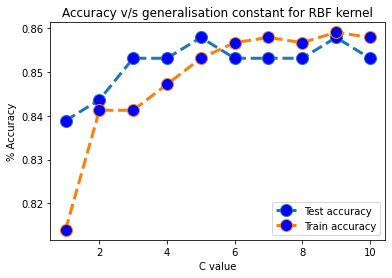

In [40]:
train_acc=[]
test_acc=[]
print("\nFor rbf kernel:")
for i in range(1,11):
  print(" C value=",i)
  svc_classifier = SVC(C=i,kernel='rbf')
  svc_classifier.fit(train_df.drop(['Class'],axis=1),train_df['Class'])
  print("   Training set accuracy:", end =" ")
  train_y_pred= svc_classifier.predict(train_df.drop(['Class'],axis=1))
  acc=getAccuracy(train_y_pred.tolist(),train_df['Class'].tolist())
  train_acc.append(acc)
  print(acc)
  print("   Test set accuracy:", end =" ")
  test_y_pred = svc_classifier.predict(test_df.drop(['Class'],axis=1))
  acc=getAccuracy(test_y_pred.tolist(),test_df['Class'].tolist())
  test_acc.append(acc)
  print(acc)


# plotting the points  
plt.plot(c_value, test_acc, linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12,label="Test accuracy") 
plt.plot(c_value, train_acc, linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12,label="Train accuracy") 
  
plt.legend()
plt.xlabel('C value') 
plt.ylabel('% Accuracy') 
plt.title('Accuracy v/s generalisation constant for RBF kernel') 
plt.show() 

# C=5 gives best test accurayc(85.782%)
